## Titanic - Machine Learning from Disasters 

hi folks,
this is my first ever project (when I am writing it I still do not know the final score).
I will try to keep it as simple as possible.
The goal is: "use machine learning to create a model that predicts which passengers survived the Titanic shipwreck".
So I have a goal, great. What about data to work with? There are two files: training set (train.csv) and test set (test.csv). It would be best to see those files, however I need to import some libraries first.

In [2]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
train = pd.read_csv('train.csv')
df_train = pd.DataFrame(train)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test = pd.read_csv('test.csv')
df_test = pd.DataFrame(test)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


At first glance you can see that those two files are more or less the same, with two exepctions though: test file is  more than two times smaller and there is no 'Survival' column there. Test file will be very useful to fill missing data (I will then combine these two files for this)

pandas_profiling is an usefull library 'which automatically generates a standardized univariate and multivariate report for data understanding'. It is a clear and easy way to view the data info.

## Feature analysis or Exploratory Data Analysis

however lovely pandas_profiling is, there are to many eggs in one basket. So to keep it simple for the purpose of my project I will break it down into smaller pieces. I believe it will help me to digg little more deeper into understanding of data.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


so we deal with 12 columns and 891 rows. In case of data types there are 5 integer, 5 object and two float columns

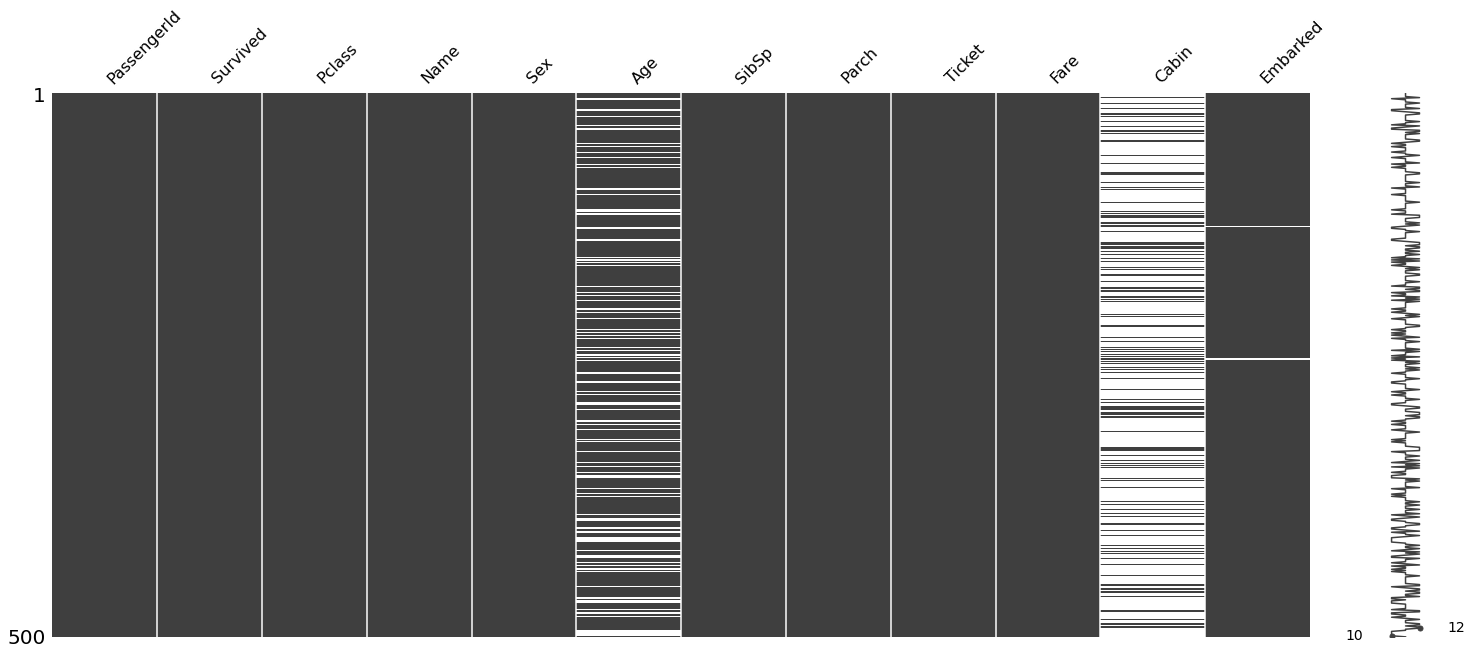

In [6]:
missing_data = msno.matrix(df_train.sample(500))

I don not think 'Cabin' column will be useful, according to pandas_profiling 77.1% is missing. In 'Age' column there is 19.9% missing but later, as I mentioned before, I can help myself and use the test + train files to refill missing age data --> but I will not use mean(), just wait and see:)

This can help better understand the variable names:

- survival:	Survival	0 = No, 1 = Yes
- pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex: 	Sex	
- Age: 	Age in years	
- sibsp:	# of siblings / spouses aboard the Titanic	
- parch:	# of parents / children aboard the Titanic	
- ticket:	Ticket number	
- fare:	Passenger fare	
- cabin:	Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

source: https://www.kaggle.com/c/titanic/data

### correlation

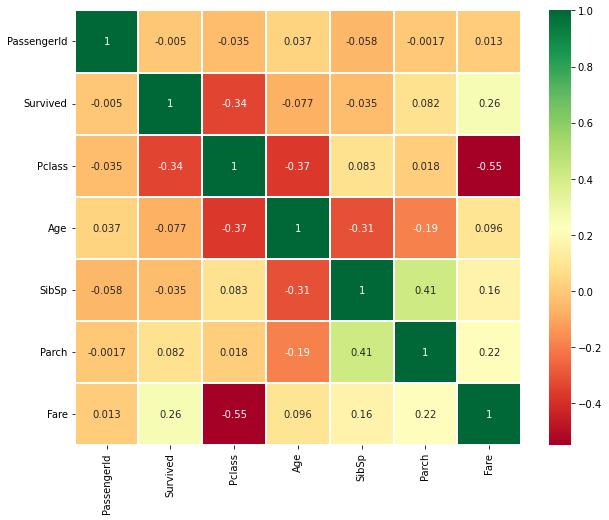

In [7]:
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

this is a place where all fun starts:) 
I is correlation between the features. What can I see here :
- biggest (negative) is between Pclass and Fare - understandable, I guess (usually) more we pay, in higher class we travel (-0.55)
- SibSp and Parch - let us call it family connections (0.41)
- Age and Pclass - again -> usually the older someone is, the more funds they have accumulated (-0.37)
and so on

but for the purpose of this task correlation to one specific column is quite important

In [8]:
surv_col_corr = df_train.corr().unstack().sort_values(ascending=False) 
surv_col_corr = pd.DataFrame(surv_col_corr).reset_index()
surv_col_corr.columns = ['main_col', 'col_name', 'correlation']
surv_col_corr.query("main_col == 'Survived' & col_name != 'Survived'") 

,main_col,col_name,correlation
10,Survived,Fare,0.257307
20,Survived,Parch,0.081629
29,Survived,PassengerId,-0.005007
34,Survived,SibSp,-0.035322
38,Survived,Age,-0.077221
44,Survived,Pclass,-0.338481


It is important to note that: correlation does not equal causation. Correlations tell us that there is a relationship between variables, but this does not necessarily mean that one variable causes the other to change.
There is not strong correlation here, nevertheless two columns: 'Fare' and 'Pclass' are 'connected' with 'Survived'
It is time to dig little bit more into data

### Fare

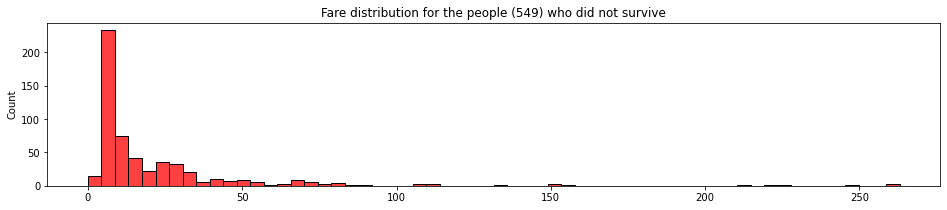

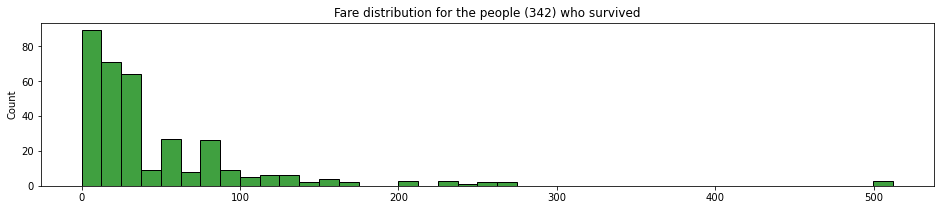

average_Fare_0 =  22.12
average_Fare_1 =  48.4


In [9]:
Fare_0 = []
Fare_1 = []
for i in range(0,891):
    if df_train["Survived"][i] == 0:
        Fare_0.append(df_train["Fare"][i])
    else:
        Fare_1.append(df_train["Fare"][i])
        
f, axes = plt.subplots(1,1, figsize = (16, 3))
fare_0_info = sns.histplot(Fare_0, color="red",ax = axes)
plt.title("Fare distribution for the people (549) who did not survive")

f, axes = plt.subplots(1,1, figsize = (16, 3))
fare_1_info = sns.histplot(Fare_1, color="green",ax = axes)
plt.title("Fare distribution for the people (342) who survived")

plt.show()
average_Fare_0 = round(sum(Fare_0)/len(Fare_0),2)
average_Fare_1 = round(sum(Fare_1)/len(Fare_1),2)
print('average_Fare_0 = ', average_Fare_0)
print('average_Fare_1 = ', average_Fare_1)

It is good to know (next time): you pay more there is a slightly greater chance of surviving :)))

### Sex

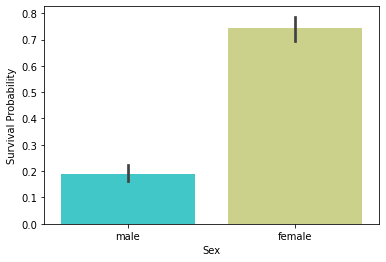

In [10]:
sex_survived_info = sns.barplot(x="Sex",y="Survived",data=df_train, palette='rainbow')
sex_survived_info = sex_survived_info.set_ylabel("Survival Probability")

<AxesSubplot:xlabel='Sex', ylabel='count'>

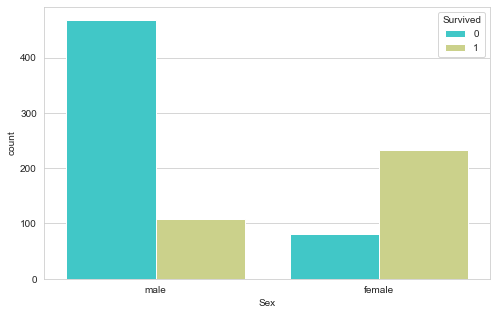

In [11]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'Sex',hue='Survived',data=df_train,palette='rainbow')

The movie was right, I can see it clearly here: women (and children) first to the lifeboat

### Age

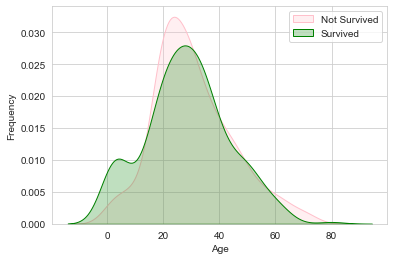

In [12]:
age_info = sns.kdeplot(df_train["Age"][(df_train["Survived"] == 0)], color="Pink", shade = True)
age_info = sns.kdeplot(df_train["Age"][(df_train["Survived"] == 1) ], ax =age_info, color="Green", shade= True)
age_info.set_xlabel("Age")
age_info.set_ylabel("Frequency")
age_info = age_info.legend(["Not Survived","Survived"])

:( sadly, not all children had the opportunity to board a lifeboat
There are 3 or 4 places where the graphs do not match:
- more children survived
- more people between 19-30 did not
- more people after 60 died, but more people around 80 did survive (it is really small difference on this graph so I think this group size is small and probably not that important) 
As I metioned before there is some missing data in 'Age' column, hence there are some negative values on x axis -> I am not sure about that, but that would be my first guess

### Pclass

In [13]:
pd.crosstab(df_train.Pclass,df_train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


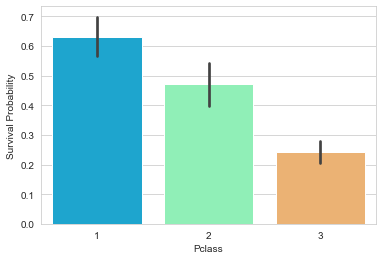

In [14]:
pclass_info = sns.barplot(x="Pclass",y="Survived",data=df_train, palette='rainbow')
pclass_info = pclass_info.set_ylabel("Survival Probability")

hmmm.. who would suspect that:))))

Text(0, 0.5, 'Density')

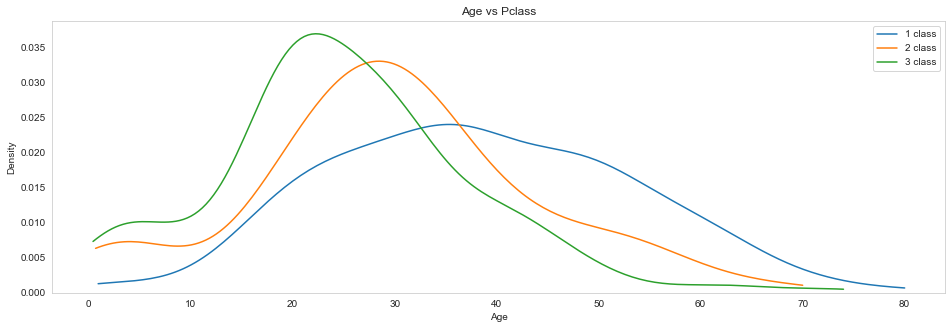

In [15]:
plt.figure(figsize=(16, 5))
for x in [1,2,3]:    ## for 3 classes
    sns.kdeplot(data=df_train.Age[df_train.Pclass == x],cut = 0, clip=(0,200)).grid(False)
    
plt.title("Age vs Pclass")
plt.legend(("1 class","2 class","3 class"))
plt.xlabel("Age")
plt.ylabel("Density")

people in 3 class are the most numerous group and also the youngest (most children traveled in the 3rd or 2nd class). First class is the most diverse in terms of age from all three

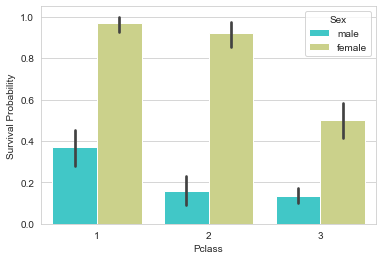

In [16]:
pclass_survived_sex = sns.barplot(x="Pclass",y="Survived", hue="Sex", data=df_train, palette='rainbow')
pclass_survived_sex = pclass_survived_sex.set_ylabel("Survival Probability")

It could not be more clear:
- women were more likely to survive (especially in 1st and 2nd class, and even for a women in 3rd, it was more probable to to survive than a man from 1st)
- men from 1st class had two times bigger survival propability than a man from 2nd or 3rd class
- indication of uncertainty for a men in 3rd class and a women in 1st class is really low -> less error possibility here, or in other words: the first group is screwed up, and if you want to be somewhere on this sinking ship, and you happen to be a girl or a woman, it's best to be in 1st class cabin.

### SibSp

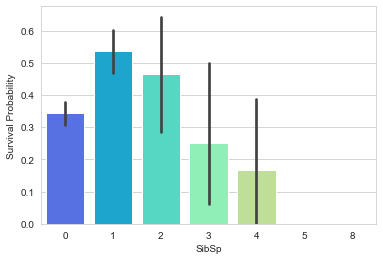

In [17]:
SibSp_survived = sns.barplot(x="SibSp",y="Survived", data=df_train, palette='rainbow')
SibSp_survived = SibSp_survived.set_ylabel("Survival Probability")

- one of two people with one sibiling/spouse survived, and 3 from 10 with zero sibiling/spouse
- other groups have not to many people to make proper predictions (0 group consists of  608 people, 1 group consists of 209, the remaining five groups consist of 74 people) --> that is why an indication of uncertainty is so high there

In [18]:
pd.crosstab([df_train.SibSp],df_train.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


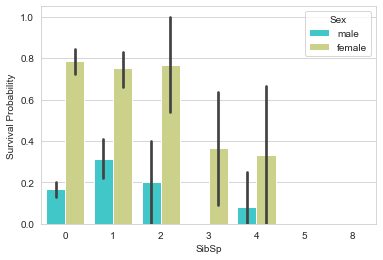

In [19]:
SibSp_survived_sex = sns.barplot(x="SibSp",y="Survived", hue="Sex", data=df_train, palette='rainbow')
SibSp_survived_sex = SibSp_survived_sex.set_ylabel("Survival Probability")

same story here: stats good for women, but from 2 to 8 groups are to small to make proper data processing

### Parch

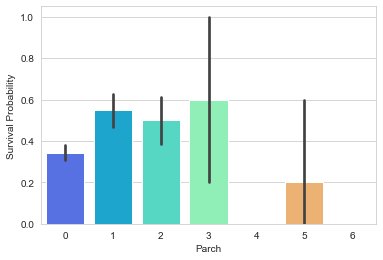

In [20]:
Parch_survived = sns.barplot(x="Parch",y="Survived", data=df_train, palette='rainbow')
Parch_survived = Parch_survived.set_ylabel("Survival Probability")

In [21]:
pd.crosstab([df_train.Parch],df_train.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


again: except 0 group, the number of others is so small that when editing the data, it will be worth combining 'Parch' and 'SibSp' and probably divide it into few bins

### Embarked

<AxesSubplot:xlabel='Embarked', ylabel='count'>

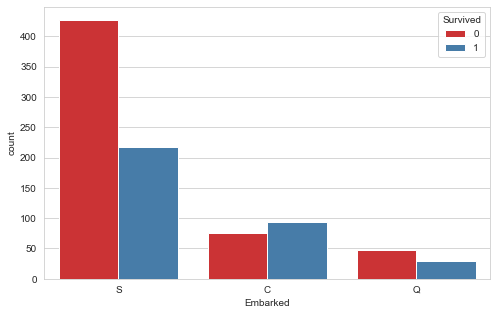

In [22]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'Embarked',hue='Survived',data=df_train, palette = "Set1" )

/Users/Agata/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/Agata/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


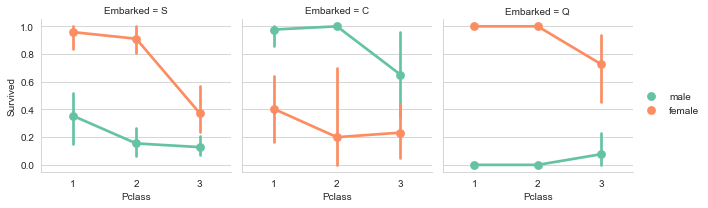

In [23]:
Embarked_Pclass_Survived_Sex = sns.FacetGrid(df_train, col = 'Embarked')
Embarked_Pclass_Survived_Sex.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=100, palette = 'Set2')
Embarked_Pclass_Survived_Sex.add_legend()

The funny thing about smaller groups is that the results of their analysis can, sometimes significantly, deviate from the results of the whole set, and this is exactly what we see here when looking at the results from 'Embarked' C - Cherbourg

<AxesSubplot:xlabel='Embarked', ylabel='count'>

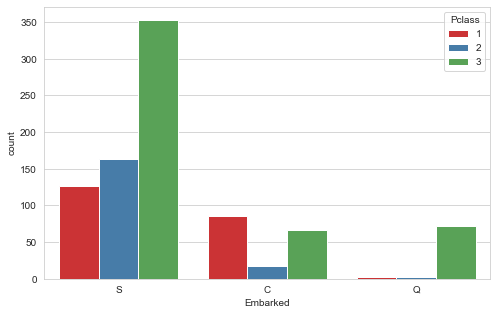

In [24]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'Embarked',hue='Pclass',data=df_train, palette = "Set1" )

<AxesSubplot:xlabel='Embarked', ylabel='count'>

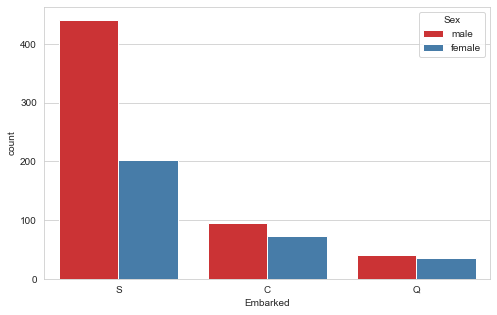

In [25]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'Embarked',hue='Sex',data=df_train, palette = "Set1" )

I was wrong, this is not the cause of the "smaller group". What we can clearly see above, in Cherbourg half of people joined the 1st class, where there was a higher probability of survival than in 3rd class - unlike people from Queenstown (over 90% were in 3rd class). Almost all Cherbourg`s 2nd class male passangers survived, that is unusual (close to one hunderet man!).

### Other (Ticket, Cabin, PassengerId, Name)

- Ticket: it cannot be categorised, it is a random string data
- Cabin: a lot of NaN values and also many passengers have multiple cabins. seems useless here
- PassengerId: cannot be categorised - it is more index-like data
- Name: I will extract 'Title' and use it for 'fueling' my prediction

## Feature Engineering and Data Cleaning

In [26]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

after Exploratory Data Analysis it is 4C`s time (Correcting, Completing, Creating, and Converting).
At this point I will start to modify/operate/use test.csv file.

At first I will extract 'Title' from 'Name' and use its age mean to refill age values.

### Name --> Title --> Title (numerical)

"most of the algorithms expect numerical values to achieve state-of-the-art results" hence converting to numerical equivalent values.

In [28]:
df_train['Title']=0
for i in df_train:
    df_train['Title']=df_train.Name.str.extract('([A-Za-z]+)\.') #extracting the Title (Salutations)
df_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

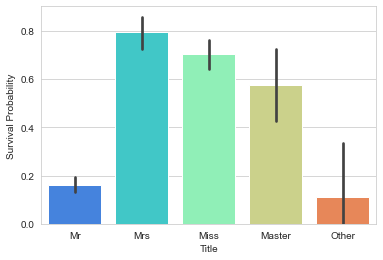

In [29]:
df_train['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
name_to_title = sns.barplot(x=df_train['Title'], y = 'Survived', data=df_train, palette='rainbow')
name_to_title = name_to_title.set_ylabel("Survival Probability")

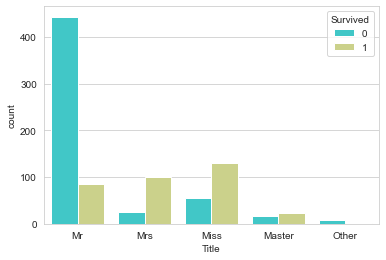

In [30]:
name_to_title = sns.countplot(x=df_train['Title'], hue = 'Survived', data=df_train, palette='rainbow')

What I did here:
- first using really neat trick (thank you Internet) I extracted salutations and I created a new column calling it 'Title'
- 17 'titles' came up so I left four of the most numerous (adding their equivalents, like 'Mlle' -> Mademoiselle --> Miss, and replaced all other with "Other", what created 5 bins (Mr, Mrs, Miss, Master, Other)

The same thing for test file:

In [31]:
df_test['Title']=0
for i in df_test:
    df_test['Title']=df_test.Name.str.extract('([A-Za-z]+)\.')
df_test['Title'].replace(['Dona','Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Mrs','Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [32]:
df_train['Title'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)
df_test['Title'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

### Age -->Age data compliting --> Age_Bin

let first join test and train data, extract some values and fill missing age values

In [33]:
linked_data =  pd.concat(objs=[df_train, df_test], axis=0).reset_index(drop=True)

In [34]:
linked_data.groupby('Title')['Age'].mean().round()

Title
0    33.0
1    37.0
2    22.0
3     5.0
4    45.0
Name: Age, dtype: float64

I'll use these to replace NaN:

In [35]:
df_train.loc[(df_train['Age'].isnull())&(df_train['Title'] == 0),'Age']= 33
df_train.loc[(df_train['Age'].isnull())&(df_train['Title'] == 1),'Age']= 37
df_train.loc[(df_train.Age.isnull())&(df_train.Title == 2),'Age']= 22
df_train.loc[(df_train.Age.isnull())&(df_train.Title == 3),'Age']= 5
df_train.loc[(df_train.Age.isnull())&(df_train.Title == 4),'Age']= 45

In [36]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [37]:
df_train['Age_Bin']=0
df_train.loc[df_train['Age']<=9,'Age_Bin']=0
df_train.loc[(df_train['Age']>9)&(df_train['Age']<=19),'Age_Bin']=1
df_train.loc[(df_train['Age']>19)&(df_train['Age']<=29),'Age_Bin']=2
df_train.loc[(df_train['Age']>29)&(df_train['Age']<=39),'Age_Bin']=3
df_train.loc[(df_train['Age']>39)&(df_train['Age']<=49),'Age_Bin']=4
df_train.loc[(df_train['Age']>49)&(df_train['Age']<=59),'Age_Bin']=5
df_train.loc[df_train['Age']>59,'Age_Bin']=6
df_train['Age_Bin'].value_counts()

3    304
2    256
1    102
4     89
0     66
5     48
6     26
Name: Age_Bin, dtype: int64

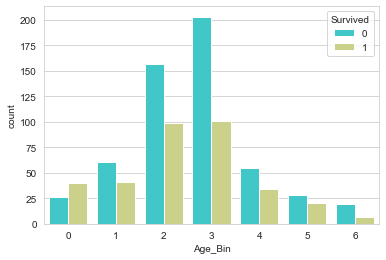

In [38]:
name_to_title = sns.countplot(x=df_train['Age_Bin'], hue = 'Survived', data=df_train, palette='rainbow')

At first I thought it would be nice to create simetrical bins (kind of for those born every decade) but 4th and next are not too numerous so i decided to 'change that

In [39]:
df_train['Age'].max()

80.0

In [40]:
cut_labels = [1, 2, 3 ,4]
cut_bins = [0,16,30,45,81]
df_train['Age_Bin'] = pd.cut(df_train['Age'], bins=cut_bins, labels=cut_labels)

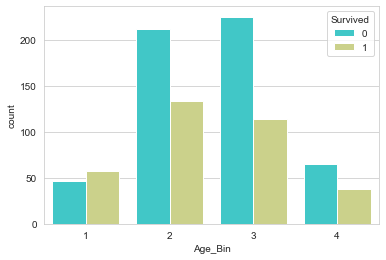

In [41]:
name_to_title = sns.countplot(x=df_train['Age_Bin'], hue = 'Survived', data=df_train, palette='rainbow')

'binning is usually discouraged. It results in loosing information, so you have worse quality features to train as compared to the raw data' that is one opinion (https://stats.stackexchange.com/questions/563813/why-use-supervised-binning-on-train-data-if-it-leaks-data). On the other hand 

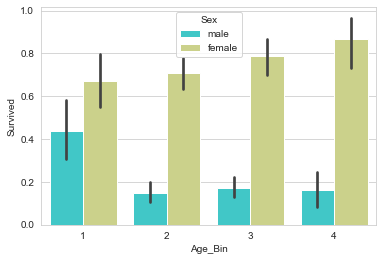

In [42]:
SibSp_survived_sex = sns.barplot(x="Age_Bin",y="Survived", hue="Sex", data=df_train, palette='rainbow')

In [43]:
df_test['Age'].max()

76.0

the same thing for test.csv:

In [44]:
df_test.loc[(df_test.Age.isnull())&(df_test.Title == 0),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Title == 1),'Age'] = 37
df_test.loc[(df_test.Age.isnull())&(df_test.Title == 2),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Title == 3),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Title == 4),'Age'] = 45

In [45]:
cut_labels = [1, 2, 3 ,4]
cut_bins = [0,13,30,45,81]
df_test['Age_Bin'] = pd.cut(df_test['Age'], bins=cut_bins, labels=cut_labels)

In [46]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
Age_Bin          0
dtype: int64

In [47]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
Age_Bin          0
dtype: int64

### Sex --> Sex (numerical)

In [48]:
df_train['Sex'].replace(['male','female'],[0,1],inplace=True)
df_test['Sex'].replace(['male','female'],[0,1],inplace=True)

### Embarked --> Embarked data compliting --> Embarked (numerical)

there are only 2 missing and only in train file. And because majority of people embarked in Southampton I will use 'S' to fill NaN

In [49]:
df_train['Embarked'].fillna('S',inplace=True)

In [50]:
df_train.Embarked.isnull().any()

False

In [51]:
df_train['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
df_test['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

### Fare --> Fare data compliting -> Fare_bin

In [52]:
df_train.Fare.isnull().any()

False

In [53]:
df_test.Fare.isnull().any()

True

only one is missing in test file - I`ll use linked_data and use mean function

In [54]:
linked_data['Fare'].mean()

33.2954792813456

In [55]:
df_test['Fare'].fillna(linked_data['Fare'].mean(),inplace=True)

In [56]:
df_test.Fare.isnull().any()

False

ok, well done Marcin. Now it`s time to make bins. I will use pd.qcut here -> “Quantile-based discretization function”

In [57]:
df_train['Fare_bin'] = pd.qcut(df_train['Fare'], 4).cat.codes
df_test['Fare_bin'] = pd.qcut(df_test['Fare'], 4).cat.codes

### Cabin --> Cabin data processing -> Cabin (numerical)

At first I thought I'd give up this column. 77.1% of the data is missing, so who would have thought it had any value. But ... if you treat the missing values as 0 (or X) and compare them with other non-missing values, it is clear that there is a difference between them.

I used the linked files to enlarge my collection and draw conclusions and then I divided it

/Users/Agata/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


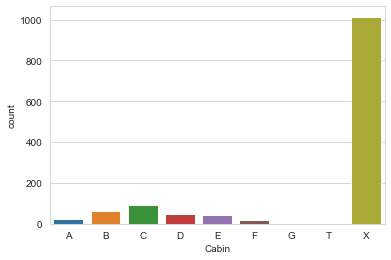

In [58]:
linked_data["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in linked_data['Cabin']])
cabin_bins = sns.countplot(linked_data["Cabin"], order=['A','B','C','D','E','F','G','T','X'])

/Users/Agata/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


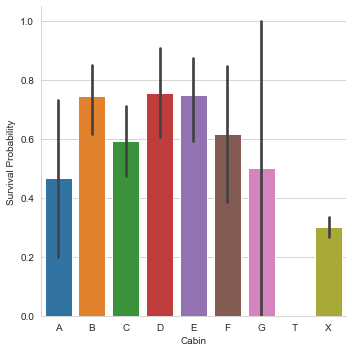

In [59]:
cabin_bins = sns.factorplot(y="Survived",x="Cabin",data=linked_data,kind="bar",order=['A','B','C','D','E','F','G','T','X'])
cabin_bins = cabin_bins.set_ylabels("Survival Probability")

X represents more than one thousand people. The remaining groups are not numerous, but faced with how many have survived, there is a significant difference between X and the rest (except T ;)
Using the chart above, I divided the 'Cabin' into 4 categories: 0: [X, T], 1: [A,G], 2: [C,F], 3: [B,D,E]. 

In [60]:
linked_data['Cabin'].replace(['A','B','C','D','E','F','G','T','X'],[1,3,2,3,3,2,1,0,0], inplace = True)

In [61]:
linked_data['Cabin'].value_counts()

0    1015
3     152
2     115
1      27
Name: Cabin, dtype: int64

/Users/Agata/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


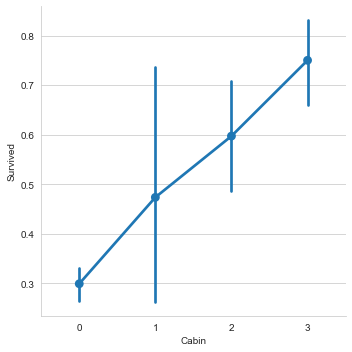

In [62]:
cabin_bins = sns.factorplot(y="Survived",x="Cabin",data=linked_data)

that is something I can use :) so:

In [63]:
df_train["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in df_train['Cabin']])
df_train['Cabin'].replace(['A','B','C','D','E','F','G','T','X'],[1,3,2,3,3,2,1,0,0], inplace = True)

In [64]:
df_test["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in df_test['Cabin']])
df_test['Cabin'].replace(['A','B','C','D','E','F','G','T','X'],[1,3,2,3,3,2,1,0,0], inplace = True)

### Family_size == SibSp + Parch

In [65]:
df_train['family_size'] = df_train.loc [: , ['SibSp','Parch']].sum(axis=1)
df_train['family_size'] = df_train['family_size'] + 1

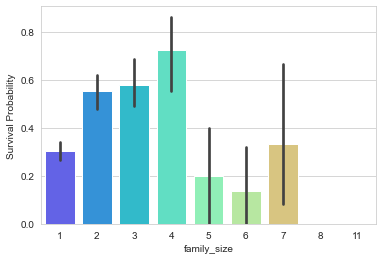

In [66]:
family_size = sns.barplot(x="family_size",y="Survived", data=df_train, palette='rainbow')
family_size = family_size.set_ylabel("Survival Probability")

In [67]:
df_test['family_size'] = df_test.loc [: , ['SibSp','Parch']].sum(axis=1)
df_test['family_size'] = df_test['family_size'] + 1

### things I decided to add after some data modeling

In future I will understand more about laws rullnig this kind of modeling, at this point when I used 'Fare_Per_Person' and 'Age*Class' and droped 'PassengerId','Age', 'SibSp', 'Parch', 'Fare', 'Name', 'Ticket' my output/predictions look better.

In [68]:
df_train['Fare_Per_Person']=df_train['Fare']/(df_train['family_size'])
df_test['Fare_Per_Person']=df_test['Fare']/(df_train['family_size'])

In [69]:
df_train['Age*Class']=df_train['Age']*df_train['Pclass']
df_test['Age*Class']=df_test['Age']*df_test['Pclass']

### one last time check

In [70]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      418 non-null    int64   
 1   Pclass           418 non-null    int64   
 2   Name             418 non-null    object  
 3   Sex              418 non-null    int64   
 4   Age              418 non-null    float64 
 5   SibSp            418 non-null    int64   
 6   Parch            418 non-null    int64   
 7   Ticket           418 non-null    object  
 8   Fare             418 non-null    float64 
 9   Cabin            418 non-null    int64   
 10  Embarked         418 non-null    int64   
 11  Title            418 non-null    int64   
 12  Age_Bin          418 non-null    category
 13  Fare_bin         418 non-null    int8    
 14  family_size      418 non-null    int64   
 15  Fare_Per_Person  418 non-null    float64 
 16  Age*Class        418 non-null    float64 
dt

In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      891 non-null    int64   
 1   Survived         891 non-null    int64   
 2   Pclass           891 non-null    int64   
 3   Name             891 non-null    object  
 4   Sex              891 non-null    int64   
 5   Age              891 non-null    float64 
 6   SibSp            891 non-null    int64   
 7   Parch            891 non-null    int64   
 8   Ticket           891 non-null    object  
 9   Fare             891 non-null    float64 
 10  Cabin            891 non-null    int64   
 11  Embarked         891 non-null    int64   
 12  Title            891 non-null    int64   
 13  Age_Bin          891 non-null    category
 14  Fare_bin         891 non-null    int8    
 15  family_size      891 non-null    int64   
 16  Fare_Per_Person  891 non-null    float64 
 1

another way to check NaN

In [72]:
df_train.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           0
Title              0
Age_Bin            0
Fare_bin           0
family_size        0
Fare_Per_Person    0
Age*Class          0
dtype: int64

In [73]:
df_test.isnull().sum()

PassengerId        0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           0
Title              0
Age_Bin            0
Fare_bin           0
family_size        0
Fare_Per_Person    0
Age*Class          0
dtype: int64

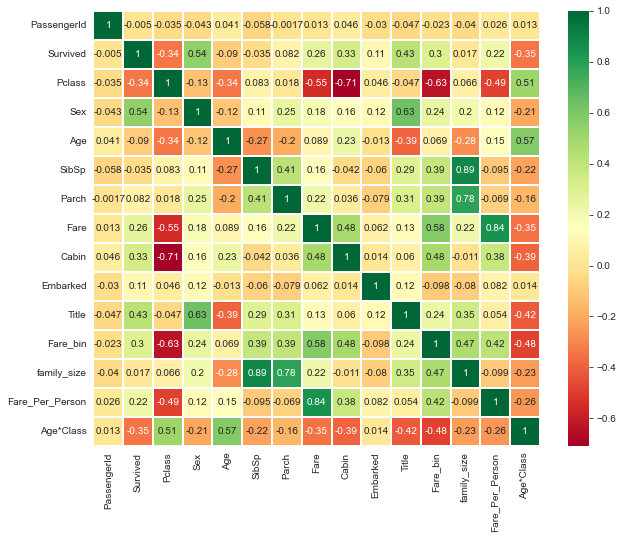

In [74]:
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [75]:
df_test.keys()

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Age_Bin', 'Fare_bin',
       'family_size', 'Fare_Per_Person', 'Age*Class'],
      dtype='object')

In [76]:
df_train = df_train.drop(columns = ['PassengerId', 'Name', 'Ticket'], axis = 1)
df_test = df_test.drop(columns = ['Name', 'Ticket'], axis = 1)

everything seems fine. I removed columns that do not contain 'proper' data

### ML tools

Scikit-learn (Sklearn) is a nice library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling that I will use below.
How will it help me?? I can see what the projected outcomes are, according to Sclearn 'tools', after analyzing a specific set of data. First, I put all the available columns.

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [78]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 14), (891,), (418, 14))

In [79]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
prediction_svc = round(svc.score(X_train, Y_train) * 100, 2)
prediction_svc

70.93

In [80]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
prediction_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
prediction_linear_svc

/Users/Agata/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


77.67

In [81]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
prediction_log = round(logreg.score(X_train, Y_train) * 100, 2)
prediction_log

/Users/Agata/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


81.59

In [82]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
prediction_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
prediction_decision_tree

98.77

In [83]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
prediction_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
prediction_perceptron

69.81

In [84]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
prediction_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
prediction_sgd

69.7

In [85]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
prediction_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
prediction_random_forest

98.77

In [86]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
prediction_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
prediction_gaussian

77.89

In [87]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
prediction_knn = round(knn.score(X_train, Y_train) * 100, 2)
prediction_knn

84.51

In [88]:
sc = []
sc.append(prediction_knn)
sc.append(prediction_gaussian)
sc.append(prediction_random_forest)
sc.append(prediction_sgd)
sc.append(prediction_perceptron)
sc.append(prediction_decision_tree)
sc.append(prediction_log)
sc.append(prediction_linear_svc)
sc.append(prediction_svc)
sc

[84.51, 77.89, 98.77, 69.7, 69.81, 98.77, 81.59, 77.67, 70.93]

In [89]:
col = ['knn','gaussian', 'random_forest', 'sgd', 'perceptron', 'decision_tree', 'log', 'linear_svc', 'svc']

In [90]:
Sclearn_score = {'sclearn_type': col,
      'all_columns': sc}

new_df = pd.DataFrame(Sclearn_score)
new_df

,sclearn_type,all_columns
0,knn,84.51
1,gaussian,77.89
2,random_forest,98.77
3,sgd,69.70
4,perceptron,69.81
5,decision_tree,98.77
6,log,81.59
7,linear_svc,77.67
8,svc,70.93


important note here: I tried a dozen or so setting options, but when some tools said the results were better, others showed a worse result. So I have put all the columns here and left the results uninterpreted at this stage.

##### according to https://www.kaggle.com/c/titanic

In [91]:
Kaggle_score = [0.78229, 0.77751, 0.77511, 0.77511, 0.77272, 0.77272, 0.77272, 0.77033, 0.76794,
                0.76555, 0.77511, 0.75598, 0.78708, 0.76076, 0.77511, 0.76076, 0.77511, 0.68660,
                0.77990, 0.78229]

components = ['Pclass, Sex, Embarked, Title, Age, SibSp, Parch, Fare_Per_Person, Age*Class',
'Pclass, Sex, SibSp, Parch, Cabin, Embarked, Title, Age, Fare, family_size, Fare_Per_Person, Age*Class',
'All',
'Pclass, Sex, Cabin, Embarked, Title, Age, Fare, family_size, Fare_Per_Person', 
'Pclass, Sex, Age, Fare, Embarked, Title, Fare_bin, family_size, Fare_Per_Person, Age*Class', 
'Pclass, Sex, Age, Fare, Embarked, Title, Fare_bin, family_size',
'Pclass, Sex, Age, Fare, Embarked, Title, family_size', 
'Pclass, Sex, SibSp, Parch,Cabin, Embarked, Title, Age_Bin, Fare_bin, family_size, Fare_Per_Person, Age*Class', 
'Pclass, Sex, Embarked, Title, Age, Fare, SibSp, Parch, Fare_Per_Person, Age*Class',
'Pclass, Sex, Age, Fare, Cabin, Embarked, Title, family_size, Fare_Per_Person, Age*Class',
'Pclass, Sex, Age',
'Age*Class, Sex, Title',
'Pclass, Sex, Title, Cabin',
'Pclass, Sex, Title, Cabin, Age',
'Pclass, Title, Cabin',
'Pclass, Title, Sex, Cabin, Fare_Per_Person',
'Pclass, Title, Sex, Cabin, Fare, family_size',
'Age_Bin, family_size, Fare_Per_Person, Age*Class, Fare_bin',
'Pclass, Sex, Age, SibSp, Parch, Title, Embarked, Cabin',
'Pclass, Sex, Title, Embarked, Cabin, Fare'
]


table = {'components': components,
         'Kaggle_score': Kaggle_score
         }
Kaggle_score_df = pd.DataFrame(table)
pd.options.display.max_colwidth = 150
Kaggle_score_df.sort_values(by=['Kaggle_score'], inplace = True, ascending=False, ignore_index=True)
left_aligned_df = Kaggle_score_df.style.set_properties(**{'text-align': 'left'})
display(left_aligned_df)


,components,Kaggle_score
0,"Pclass, Sex, Title, Cabin",0.787080
1,"Pclass, Sex, Embarked, Title, Age, SibSp, Parch, Fare_Per_Person, Age*Class",0.782290
2,"Pclass, Sex, Title, Embarked, Cabin, Fare",0.782290
3,"Pclass, Sex, Age, SibSp, Parch, Title, Embarked, Cabin",0.779900
4,"Pclass, Sex, SibSp, Parch, Cabin, Embarked, Title, Age, Fare, family_size, Fare_Per_Person, Age*Class",0.777510
5,"Pclass, Sex, Cabin, Embarked, Title, Age, Fare, family_size, Fare_Per_Person",0.775110
6,"Pclass, Title, Sex, Cabin, Fare, family_size",0.775110
7,"Pclass, Title, Cabin",0.775110
8,All,0.775110
9,"Pclass, Sex, Age",0.775110


What can we see here? Kaggle.com allows 10 attempts a day. Above You can see all of my attempts (20) and with what set of data (columns) I was able to achieve it.
Before I start with my conclusions, it should be noted that Kaggle uses the RandomForestClassifier here and if we had used a different tool the results would probably have been different from the present ones. So:
- bins weren`t helpful, at least in my best 4 scores, so it seems this set of decision trees prefer more 'distributed data',
- the sum of all columns [All] has the fourth best score, so I can say there is strength in quantity. There is a 0.01197 difference between best result and All result, which is almost 1.2%. It is a lot in some cases,  
- the last result is far from the rest. Probably the reason is that the data used is imprecise (2 out of 5 are bins) and the other 3 were created by combining existing columns according to the logic 1 + 1 = 1,
- the difference between the first and the last but one result is 0.0311 or 3.11%. We operate here with 14 columns, out of 19 attempts it does not seem to be a significant range, and
- the best result was achieved with just 4 columns (Pclass, Sex, Title, Cabin), as we can see below these are 4 of the 5 most correlated columns with 'Survived'. I must add here that the presence in the 'winning four' of Pclass, Sex and Title is not surprising for me. Previous data analysis clearly showed how important Pclass and Sex were. The Title refers mainly to gender and age, and in my opinion very efficiently (high entropy) divides the group into bins. However, the presence of Cabin, WOW .. this is just an unexpected 'twist'. Let me just remind you that I originally planned to drop this column because 77.1% of the data was missing! 77%!! You never know. Cool lesson for me:)

P.S. I did a quick Kaggle test and checked the result for the 4 best correlated with Survived, that is: "Sex", "Title", "Age*Class", "Cabin" and the score is.. 0.74880. I have to say it again:  correlation does not equal causation:)

In [92]:
surv_col_corr = df_train.corr().unstack().sort_values(ascending=False) 
surv_col_corr = pd.DataFrame(surv_col_corr).reset_index()
surv_col_corr.columns = ['main_col', 'col_name', 'correlation']
surv_col_corr.query("main_col == 'Survived' & col_name != 'Survived'") 

,main_col,col_name,correlation
27,Survived,Sex,0.543351
36,Survived,Title,0.425396
50,Survived,Cabin,0.332804
55,Survived,Fare_bin,0.299357
59,Survived,Fare,0.257307
68,Survived,Fare_Per_Person,0.221600
94,Survived,Embarked,0.106811
102,Survived,Parch,0.081629
120,Survived,family_size,0.016639
130,Survived,SibSp,-0.035322


Thank You for reading my project. If you have any comments, I will be glad to hear from you. Half a year ago I didn't even have a laptop, and now I can do such interesting analyzes and this is just the beginning of my path. I am curious what the future will bring.
Have a nice day :)